In [2]:
!pip install distance

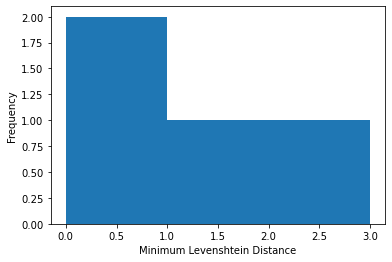

In [3]:
import distance
import matplotlib.pyplot as plt

# Define two sets of molecular fragments
set1 = ['CO', 'OH', 'H2O', 'CO2']
set2 = ['CO', 'NO', 'N2O', 'CO2']

# Compute the minimum Levenshtein distance for each fragment
min_distances = []
for frag1 in set1:
    distances = []
    for frag2 in set2:
        distances.append(distance.levenshtein(frag1, frag2))
    min_distances.append(min(distances))

# Plot the distribution of minimum distances
plt.hist(min_distances, bins=range(max(min_distances)+2))
plt.xlabel('Minimum Levenshtein Distance')
plt.ylabel('Frequency')
plt.show()

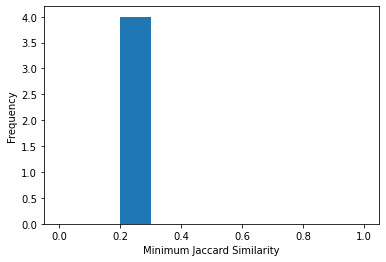

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define two sets of molecular fragments
set1 = ['CO', 'OH', 'H2O', 'CO2']
set2 = ['CO', 'NO', 'N2O', 'CO2']

# Compute the Jaccard similarity between each pair of fragments
jaccard_similarities = np.zeros((len(set1), len(set2)))
for i, frag1 in enumerate(set1):
    for j, frag2 in enumerate(set2):
        intersection = set(frag1).intersection(set(frag2))
        union = set(frag1).union(set(frag2))
        jaccard_similarities[i][j] = len(intersection) / len(union)

# Compute the minimum Jaccard similarity for each fragment
min_similarities = []
for i, frag1 in enumerate(set1):
    similarities = []
    for j, frag2 in enumerate(set2):
        similarities.append(jaccard_similarities[i][j])
    min_similarities.append(min(similarities))

# Plot the distribution of minimum similarities
plt.hist(min_similarities, bins=np.linspace(0, 1, num=11))
plt.xlabel('Minimum Jaccard Similarity')
plt.ylabel('Frequency')
plt.show()

In [5]:
!pip install EFGs

In [6]:
import pandas as pd
chembl = pd.read_csv('../data/chembl27_efg.csv')

In [7]:
from ast import literal_eval
chembl['efgs'] = chembl.efgs.apply(lambda x: literal_eval(str(x)))

In [8]:
 chembl['functional_groups'] = chembl['efgs'].apply(lambda p: p[0])

In [9]:
efg_vocab = chembl.explode('functional_groups').drop_duplicates('functional_groups')['functional_groups']

In [10]:
efg_vocab 

0                                            C=O
0                                             Cl
0                           O=c1cn[nH]c(=O)[nH]1
0                                       c1ccccc1
1                                            C#N
                           ...                  
1941298        C=C/C=C/C(=O)NC1=CC(=O)C(O)=CC1=O
1941304                           O=CNNC=CC(=O)O
1941337                       N/C(S)=N/NC(=O)C=O
1941363                     O=CN/C=C/SS/C=C\NC=O
1941375    NC(=O)N/N=C1\C=CC(NCS(=O)(=O)O)=CC1=O
Name: functional_groups, Length: 19629, dtype: object

In [11]:
efg_vocab = efg_vocab.dropna().tolist()

In [12]:
from tqdm import tqdm
tqdm.pandas()


In [13]:
import json
vocab = list(json.loads(open('../data/vocab.json').read())['model']['vocab'].keys())

In [14]:
import seaborn as sns
sns.set()

## Jaccard Similarity

In [15]:
vocab = vocab[54:]

In [16]:
jaccard_similarities = np.zeros((len(vocab), len(efg_vocab)))
for i, frag1 in tqdm(enumerate(vocab)):
    for j, frag2 in enumerate(efg_vocab):
        intersection = set(frag1).intersection(set(frag2))
        union = set(frag1).union(set(frag2))
        jaccard_similarities[i][j] = len(intersection) / len(union)

# Compute the minimum Jaccard similarity for each fragment
min_similarities = []
for i, frag1 in enumerate(vocab):
    similarities = []
    for j, frag2 in enumerate(efg_vocab):
        similarities.append(jaccard_similarities[i][j])
    min_similarities.append(max(similarities))


7946it [15:10,  8.73it/s]


In [17]:
df_describe = pd.DataFrame(min_similarities)
df_describe.describe()

,0
count,7946.000000
mean,0.775121
std,0.171519
min,0.200000
25%,0.666667
50%,0.777778
75%,0.909091
max,1.000000


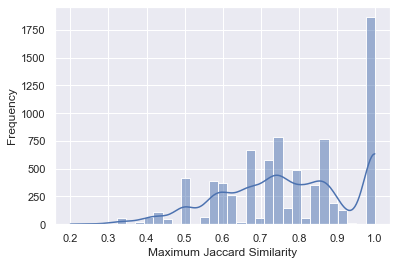

In [18]:
# Plot the distribution of minimum similarities
#plt.hist(min_similarities)#, bins=np.linspace(0, 1, num=11))
sns.histplot(min_similarities, kde=True)
plt.xlabel('Maximum Jaccard Similarity')
plt.ylabel('Frequency')
plt.show()

7946it [7:31:18,  3.41s/it]


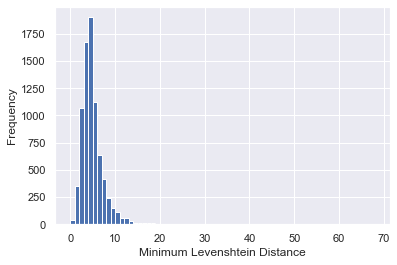

In [21]:
import distance
import matplotlib.pyplot as plt


# Compute the minimum Levenshtein distance for each fragment
min_distances = []
for i, frag1 in tqdm(enumerate(vocab)):
    distances = []
    for j, frag2 in enumerate(efg_vocab):
        distances.append(distance.levenshtein(frag1, frag2))
    min_distances.append(min(distances))

# Plot the distribution of minimum distances
plt.hist(min_distances, bins=range(max(min_distances)+2))
plt.xlabel('Minimum Levenshtein Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
def generate_ngrams(n):
    ngrams = []
    for smiles in smiles_list: 
        for j in range(max(1, len(smiles)-n+1)):
            ngrams.append(' '.join(smiles[j:j+n]))
    return ngrams 
ngrams = {}
for i in range(1, 30): 
    ngrams[i] = generate_ngrams(i)

In [ ]:
vocab_len = {}
for w in vocab: 
    x = len(w)
    if x in vocab_len: 
        vocab_len[x] += 1
    else:
        vocab_len[x] = 1

In [ ]:
import random
random_vocab = []
for length, size in vocab_len.items():
    if length in ngrams:
        random_vocab.extend(random.sample(ngrams[length], size))

In [ ]:
jaccard_similarities_random = np.zeros((len(random_vocab), len(efg_vocab)))
for i, frag1 in enumerate(random_vocab):
    for j, frag2 in enumerate(efg_vocab):
        intersection = set(frag1).intersection(set(frag2))
        union = set(frag1).union(set(frag2))
        jaccard_similarities_random[i][j] = len(intersection) / len(union)

# Compute the minimum Jaccard similarity for each fragment
min_similarities_random = []
for i, frag1 in enumerate(random_vocab):
    similarities = []
    for j, frag2 in enumerate(efg_vocab):
        similarities.append(jaccard_similarities_random[i][j])
    min_similarities_random.append(max(similarities))

In [ ]:
pd.DataFrame(min_similarities_random).describe()

In [ ]:
# Plot the distribution of minimum similarities
#plt.hist(min_similarities)#, bins=np.linspace(0, 1, num=11))
df_to_plot = pd.concat([pd.DataFrame(min_similarities_random, columns=['similarity']).assign(vocab='Random'), 
           pd.DataFrame(min_similarities, columns=['similarity']).assign(vocab='BPE')]).reset_index()
sns.displot(data=df_to_plot, x='similarity', hue='vocab', kde=True, fill=True)
plt.xlabel('Maximum Jaccard Similarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# min_distances = []
# for frag1 in vocab:
#     distances = []
#     for frag2 in efg_vocab:
#         distances.append(distance.levenshtein(frag1, frag2))
#     min_distances.append(min(distances))

# # Plot the distribution of minimum distances
# #plt.hist(min_distances)
# sns.histplot(min_distances, kde=True)
# plt.xlabel('Minimum Levenshtein Distance')
# plt.ylabel('Frequency')
# plt.show()